In [40]:

import os
import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt
import CASBI
from ili.validation.metrics import PosteriorCoverage
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


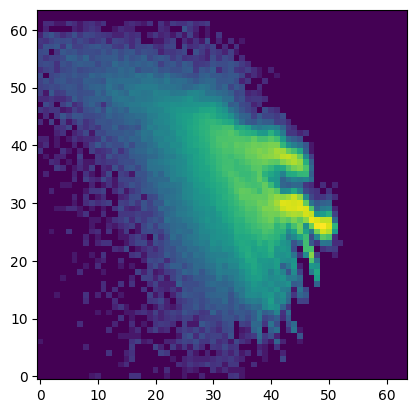

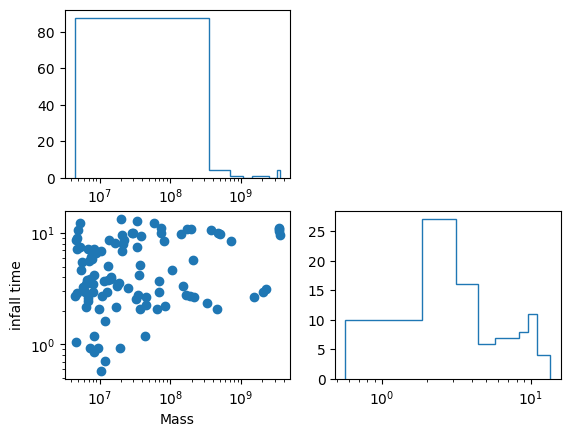

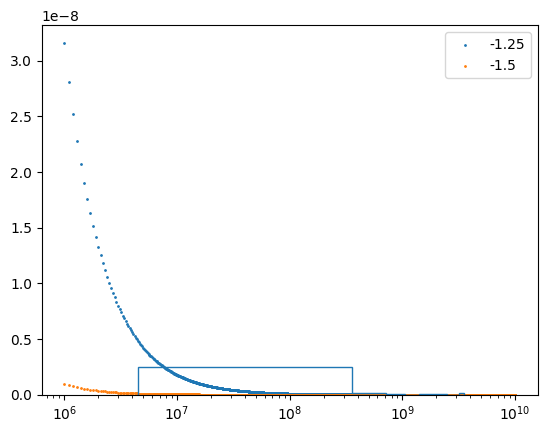

Galaxy: 2.79e12.02000.npz Most massive merger mass:, 9.55


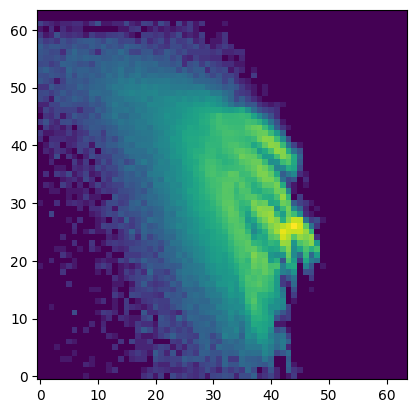

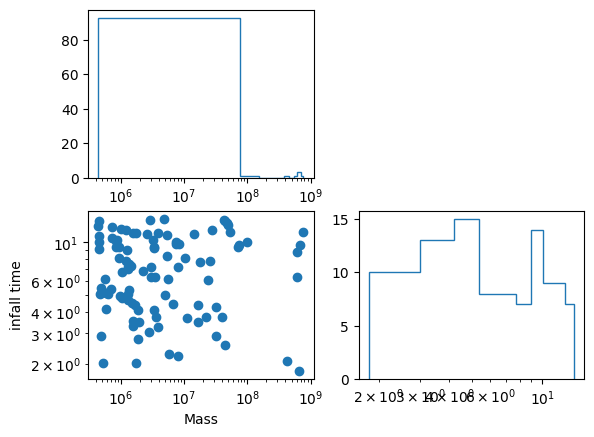

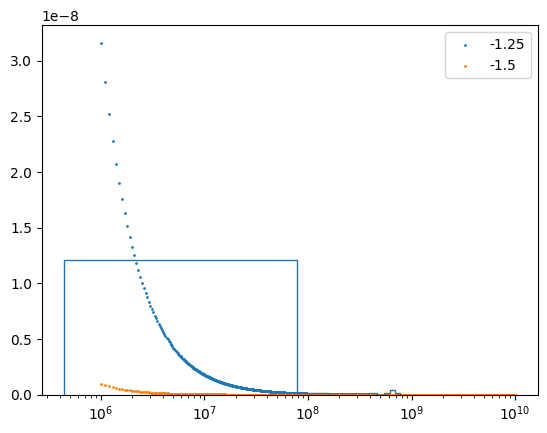

Galaxy: 1.12e12.02000.npz Most massive merger mass:, 8.89


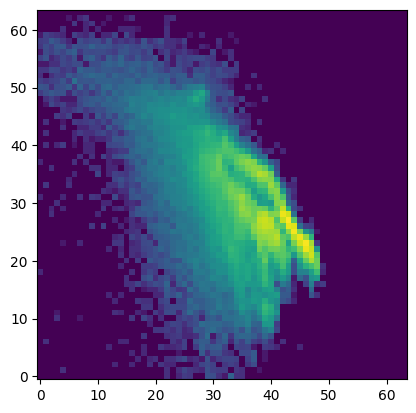

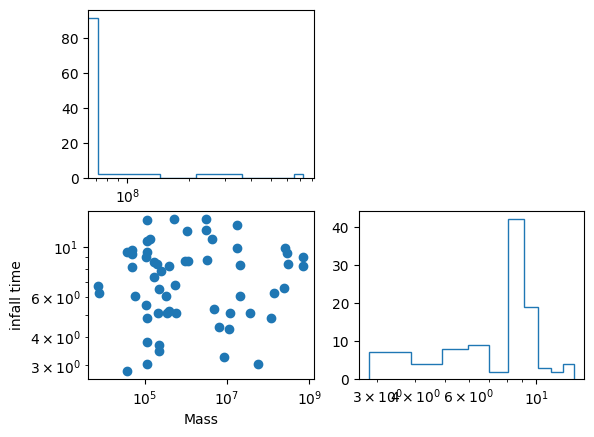

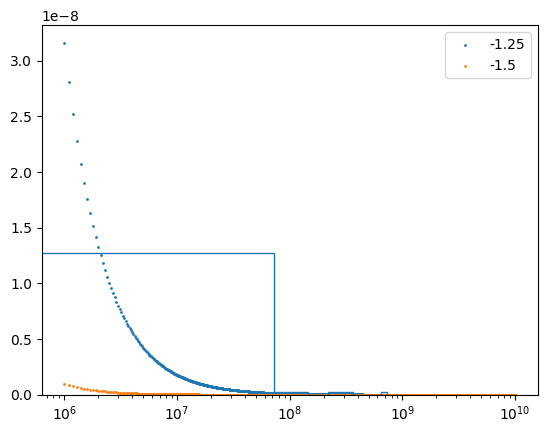

Galaxy: 6.96e11.01024.npz Most massive merger mass:, 8.86


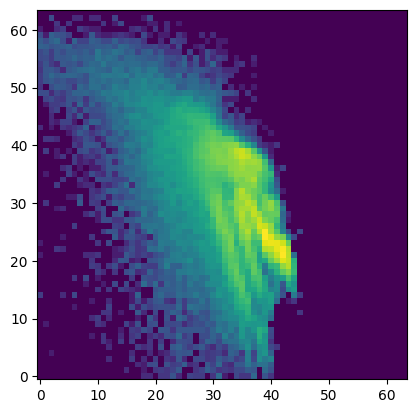

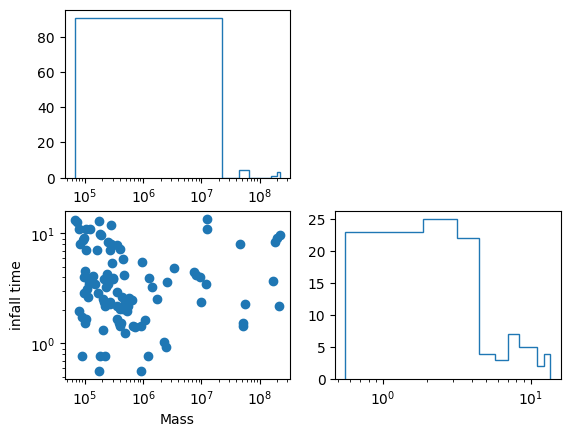

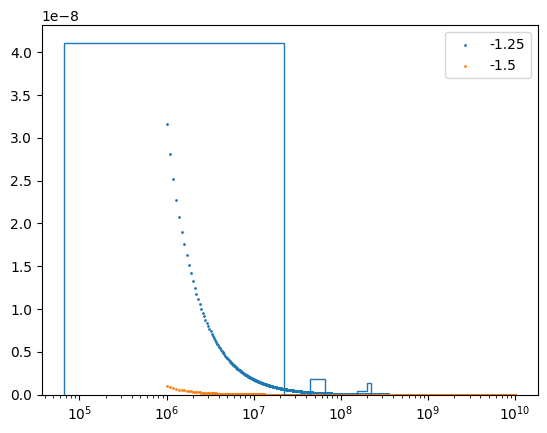

Galaxy: 7.08e11.01024.npz Most massive merger mass:, 8.35


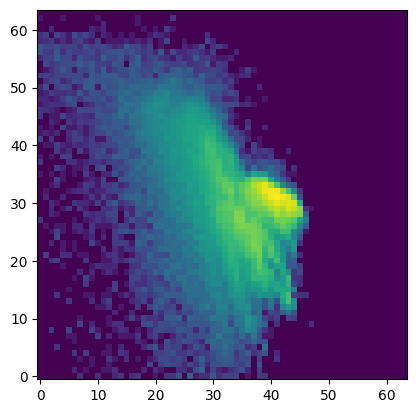

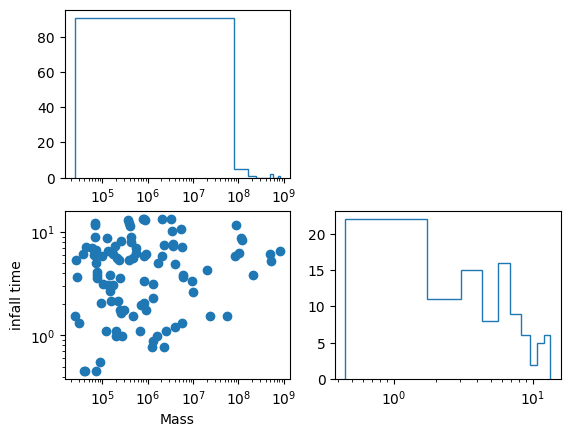

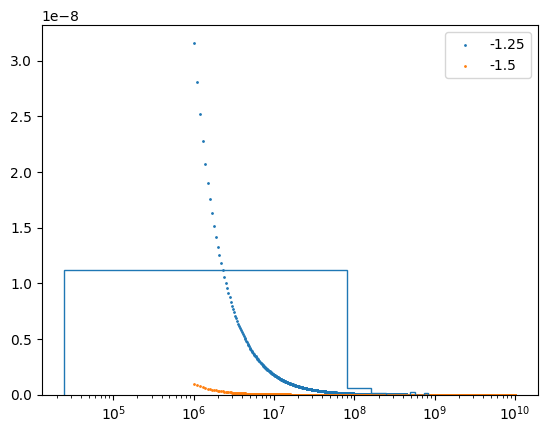

Galaxy: 7.55e11.01024.npz Most massive merger mass:, 8.91


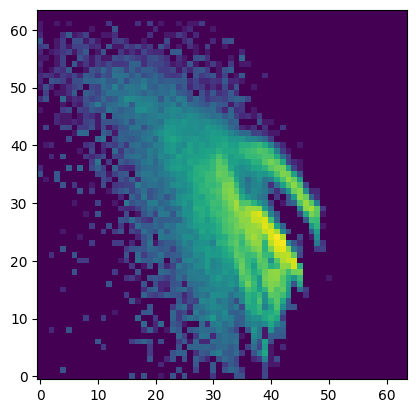

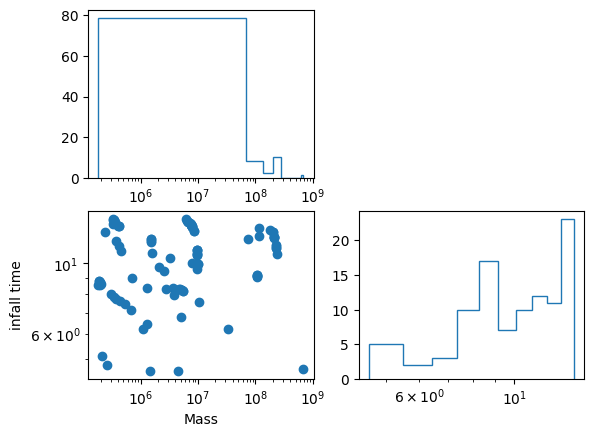

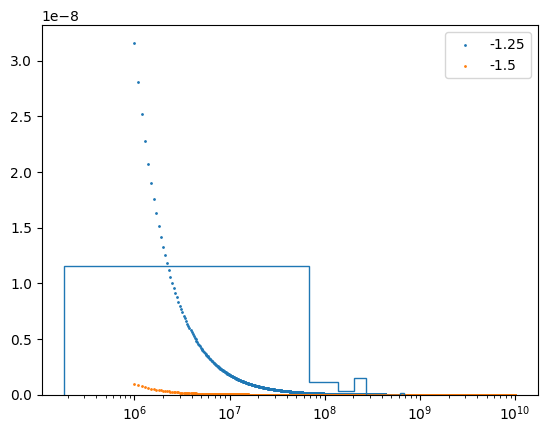

Galaxy: 8.26e11.02000.npz Most massive merger mass:, 8.84


In [116]:
for file in os.listdir('./file/'):
    arr = np.load(os.path.join('./file', file))
    theta = torch.tensor(arr['theta'])
    x = torch.tensor(arr['x'])
    plt.imshow(np.log10(x[0, :, :, 0].T+1), origin='lower')
    
    fig = plt.figure()
    ax = fig.add_subplot(221)
    ax.hist(theta[:, 0], histtype='step',)
    ax.set_xscale('log')
    ax = fig.add_subplot(223)
    ax.scatter(theta[:, 0], theta[:, 1])
    ax.set_xlabel('Mass')
    ax.set_xscale('log')
    ax.set_ylabel('infall time')
    ax.set_yscale('log')
    ax = fig.add_subplot(224)
    ax.hist(theta[:, 1], histtype='step',)
    ax.set_xscale('log')
    
    fig = plt.figure()
    arr = np.linspace(10**6, 10**10, 100000, )
    plt.scatter(arr, arr**(-1.25), s=1, label='-1.25')
    plt.scatter(arr, arr**(-1.5), s=1, label='-1.5')
    plt.hist(theta[:, 0], histtype='step', density=True)
    plt.xscale('log')
    # plt.ylabel('log')
    plt.legend()
    plt.show()
    print(f'Galaxy: {file} Most massive merger mass:, {np.log10(theta[:, 0].max()):.2f}')

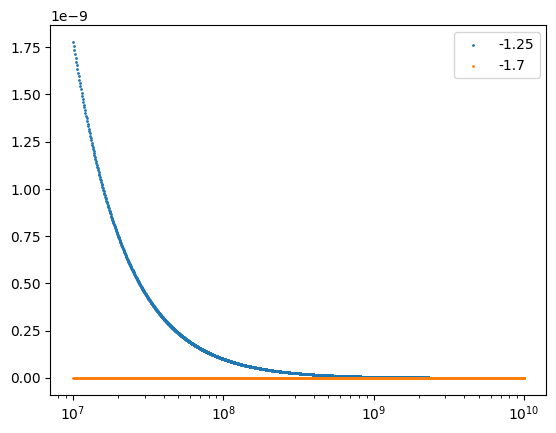

In [125]:
arr = np.linspace(10**7, 10**10, 100000, )
plt.scatter(arr, arr**(-1.25), s=1, label='-1.25')
plt.scatter(arr, arr**(-1.7), s=1, label='-1.7')
# plt.scatter(arr, arr**(-0.25), label='-0.25')
# plt.scatter(arr, arr**(-0.9), label='-0.9')
# plt.hist(theta[:, 0], histtype='step', density=True)
plt.xscale('log')
# plt.ylabel('log')
plt.legend()

In [43]:
with open('../posterior/posterior_0.0/posterior.pkl', 'rb') as model:
    posterior_ensamble = pickle.load(model)
    
for file in os.listdir('./file/'):
    arr = np.load(os.path.join('./file', file))
    theta = torch.tensor(arr['theta'])
    x = torch.tensor(arr['x']).permute(0, 3, 1, 2)
    x[:, 0, :, :] = torch.log10(x[:, 0, :, :]+1)
    print(f'Galaxy: {file} Most massive merger mass:, {np.log10(theta[:, 0].max()):.2f}')
    
    plot_hist = ["coverage", "histogram", "predictions", "tarp"]
    metric = PosteriorCoverage(
        num_samples=2_000, sample_method='direct',
        labels=[rf'$\log_{{10}}(M_{{s}}) [M_{{\odot}}]$', rf'$\log_{{10}}(\tau) [Gyr]$'], plot_list = plot_hist
    )

    fig = metric(
        posterior=posterior_ensamble,
        x=x, theta=torch.log10(theta))
    
    fig[0].savefig(f'./plot/{file[:-4]}_coverage.pdf')
    fig[1].savefig(f'./plot/{file[:-4]}_histogram.pdf')
    fig[2].savefig(f'./plot/{file[:-4]}_predictions.pdf')
    fig[3].savefig(f'./plot/{file[:-4]}_tarp.pdf')

Galaxy: 2.79e12.02000.npz Most massive merger mass:, 9.55


  8%|▊         | 8/100 [00:03<00:42,  2.18it/s]
/export/home/vgiusepp/miniconda3/envs/test_sstrax/lib/python3.12/site-packages/ili/validation/metrics.py:614: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("Log-likelihood $\mathbb{E}[\log q(\\theta_o | x_o)]$")


KeyboardInterrupt: 

INFO:root:Sampling models with [216, 258, 261, 265] samples each.
Drawing 216 posterior samples: 353it [00:00, 3159.38it/s]
Drawing 258 posterior samples: 484it [00:00, 4223.03it/s]
Drawing 261 posterior samples: 503it [00:00, 4567.14it/s]
Drawing 265 posterior samples: 523it [00:00, 4786.02it/s]
INFO:root:Sampling models with [216, 258, 261, 265] samples each.
Drawing 216 posterior samples: 361it [00:00, 3239.86it/s]
Drawing 258 posterior samples: 497it [00:00, 4452.57it/s]
Drawing 261 posterior samples: 497it [00:00, 4322.13it/s]
Drawing 265 posterior samples: 517it [00:00, 4763.73it/s]
INFO:root:Sampling models with [216, 258, 261, 265] samples each.
Drawing 216 posterior samples: 356it [00:00, 3110.22it/s]
Drawing 258 posterior samples: 498it [00:00, 4403.28it/s]
Drawing 261 posterior samples: 489it [00:00, 4377.27it/s]
Drawing 265 posterior samples: 519it [00:00, 4662.36it/s]
INFO:root:Sampling models with [216, 258, 261, 265] samples each.
Drawing 216 posterior samples: 375it [00

TypeError: can't convert cuda:5 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

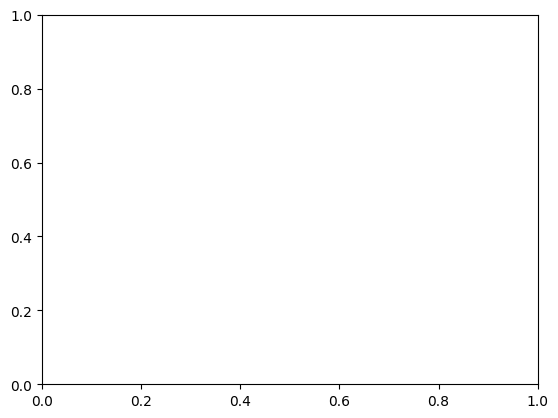

In [78]:
predicted_mass = []
for i in range(len(x)):
    samples = posterior_ensamble.sample(1000, x=x[0, :, :, :])
    samples = samples.mean(axis=0)
    predicted_mass.append(samples[0])
    


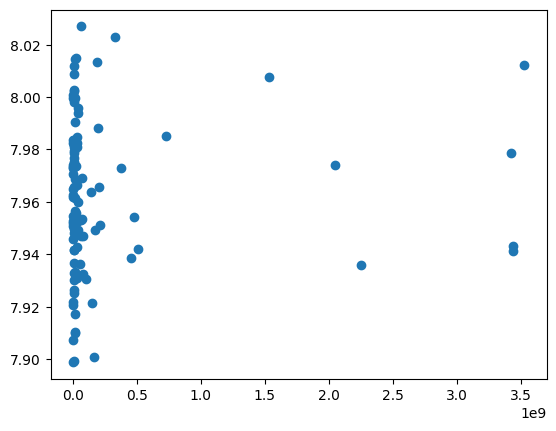

In [90]:
plt.scatter(theta[:, 0].detach().cpu(), [a.cpu() for a in predicted_mass])

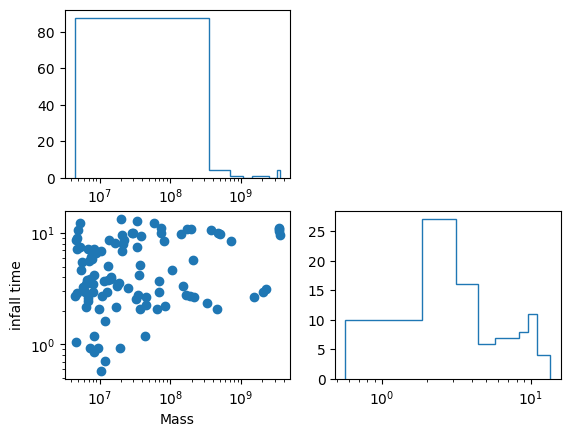

In [94]:
fig = plt.figure()

ax = fig.add_subplot(221)
ax.hist(theta[:, 0], histtype='step',)
ax.set_xscale('log')
ax = fig.add_subplot(223)
ax.scatter(theta[:, 0], theta[:, 1])
ax.set_xlabel('Mass')
ax.set_xscale('log')
ax.set_ylabel('infall time')
ax.set_yscale('log')
ax = fig.add_subplot(224)
ax.hist(theta[:, 1], histtype='step',)
ax.set_xscale('log')